In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neattext as nt
import re
from wordcloud import WordCloud

In [2]:
df=pd.read_json('AS2.json')

In [3]:
df

,text,date,label,id,label_name
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming
...,...,...,...,...,...
6438,Praying for {{USERNAME}} family friends riding...,2021-08-29,3,1431979856120762370,daily_life
6439,"Etsy: {{USERNAME}} Hi there, I m sorry to hear...",2021-08-29,1,1432008666018942977,business_&_entrepreneurs
6440,Imagine how hard it is to be a Teume. Everyone...,2021-08-29,2,1432008666803097606,pop_culture
6441,Ride With Me - Mental Health Awareness Charity...,2021-08-29,2,1432069101753491456,pop_culture


In [4]:
df.isnull().sum()

text          0
date          0
label         0
id            0
label_name    0
dtype: int64

---
# Data Preparation
---

In [5]:
df.text=df.text.apply(lambda x:re.sub('{+@*[A-z,a-z\s*@*]+}+','',x))

In [6]:
df.text

0       The  beat the  4-0 in Game 1 of the Western Di...
1       I would rather hear Eli Gold announce this Aub...
2       Someone take my phone away, I’m trying to not ...
3       A year ago, Louisville struggled to beat an FC...
4       Anyone know why the #Dodgers #Orioles game nex...
                              ...                        
6438    Praying for  family friends riding out IDA be ...
6439    Etsy:  Hi there, I m sorry to hear that your a...
6440    Imagine how hard it is to be a Teume. Everyone...
6441    Ride With Me - Mental Health Awareness Charity...
6442    Prediction: The future of CX in  Quarterly. #h...
Name: text, Length: 6443, dtype: object

In [7]:
def text_cleaning(text):
    text=text.lower()
    text=nt.fix_contractions(text)
    text=nt.remove_hashtags(text)
    text=nt.remove_emojis(text)
    text=nt.remove_userhandles(text)
    text=re.sub(re.compile(r'[^A-Za-z0-9 ]+', re.UNICODE),' ',text)
    #text=nt.remove_multiple_spaces(text)
    text=nt.remove_numbers(text)
    text=nt.remove_shortwords(text,3)
    text=nt.remove_stopwords(text)
    return ' '.join(text.split())

In [8]:
df['cleaned_text']=df.text.apply(lambda x:text_cleaning(x))

In [9]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\Zee
[nltk_data]     Tech\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
df['cleaned_text']=df['cleaned_text'].apply(lambda x:' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [11]:
for i in df.cleaned_text:
    print(i)

beat game western division final evan edward josh roberson
hear gold announce auburn game dumbass
phone away trying look home game ticket october
year louisville struggled beat opponent score indicative game flow today demoralizing better opponent thank glad gone
know game thursday arguably game entire schedule imagine
care gave shot struggling joey offer game decide want starting mississippi state game
okay watch unlv game
check largest crowd basketball game phil arena aim attendance record fiba world final target fiba allows incredible
voted best video game
streaming game come stop join
unanswered goal tied game
little voice left completely exhausted change world exciting broadcaster game winning play time expires tonight second time calling monumental georgetown
great win yesterday stay go game season great callum bennett impressive home especially youth stepping
refreshing twitter hard right gopher game
raginggirlgamer featured visit earn chance
latest victim madden curse cover gam

check patrick mahomes chief autograph nameplate football jersey case available
check patrick mahomes chief engraved nameplate football jersey case available
biggest snub oscar shortlist jennifer lopez adam sandler
added listing poshmark jennifer lopez boyfriend jean
discovered poshmark jennifer lopez gold shimmer straight pant
check vintage kansa city chief reebok field adjustable embroidered
bird prey opening weekend seriously underperforming cinemablend
lauren know hedgehog masked singer heard retweeting revealed
marley wailer redemption song official video
office bird prey disappoints mediocre friday
woman gone marley visit
check world series helmet
latest cheering thanks
imagine watching millionaire play contrived game hour benefit billionaire baby time
people giving season time backing enjoying backing team stress
tonight daytona winner join live race plus series director brad moran form world series stream
think need reach year doni morale lost football guy parade patrick mahomes

enjoy stream tonight loved support believe dropped following happy appreciate massively best fifa played stream thanks shown support
house band sang half verse morning tune stuck spent trying come lyric find song cause love song heard age tonight finally found breathe
georgia star baseball academy christian mansfield dog seed play select bright early start bracket play
godfather hour stream rolling early morning house vibe dropping connoisseur selection early morning musical education rosetta stone business check godfather stream rinse
good morning highness
sorry need care scared love cause weaker wrong wrong strong
listen wake morning urban talk news laugh
correct year idhe time morning samantha entry
furniture listen wake morning urban talk news laugh
morning second gold bracket game watch glory johnson avvisato team
privileged preach friend carlairving lead efceastbourne morning
sunday morning rain falling steal cover share skin rome italy
great work hour officer staff high demand g

favorite music week fnmtw week playlist hosted scrappydoo deezer playlist created deezer fnmtw crew update spotify link daily past week pick
check added closet poshmark retrolicious dress constellation glow dark
literally joke posting social medium clout need tell stfu
second destined classic trilogy trial koli
second article wcag
reason weighed bout announced title arbitrarily khabib abdicated lightweight title second retirement know crown dustin champion
company large small choosing mexico second straight year people moving moving leadership continue leverage state strength
half term manchester united grade devil half season latest piece grade second half campaign kick
shooting turning ball decent rossview capitalizing midway second
crutcher tear heart second straight year flyer
want know reason selin audacity self confidence know engin aydan tell truth stop plan watch cumartesi
commentary prepares second season grand prix world series season festival involving tier team watkins glen

send week treated great fight sadly people choose focus negative believe people booing gave round legitimately fight
send tech team connection restored day exchanging msg thrudm happening
russia offer turkey send astronaut space station turkey news
mile sander carlos hyde send help
finally happy album executive produced
send regard woodward tell hell straightaway
struggle understand fan surprised result manager managed cardiff poor molde good league compared league thought better mourinho gaal
love work hotel waco especially spent year hotel mgmt specialized build renovation send resume
understand broadcaster race double interview winner
live rolling loud york main feed
breaking came people noted resemblance character jesse help jesse
camino review aaron paul return film reminding love breaking
breaking custom square fridge magnet pollos hermanos
seahawks trail brown thought quarter gamecenter
harry royal visit nottingham world mental health
inning evened score diablas defense held
bre

guest today music start noon montreal
bos lady rubina dilaik anthem roach killa bigg bos song
aaron rodgers gonna comeback go like year team draft replacement round string second round instead drafting player help game time hang
news second edition understand importance find
happening today hour seminole county begin handing second dose vaccine public appointment today live morning detail starting wkmg
join february second free workshop gregorian chant superb colleague
happiness choose point dwelling dark ignoring light star
hand know close diaz light tell close
confused parent covid vaccine dodger stadium week appointment second
lovely chat breakfast morning positive news bath chatted second series confirmed wonderful community project design heart send display
bradford city unchanged second time trueman sellars bench hornby wood sutton watt clarke cooke evans rowe bench huffer canavan donaldson stevens french burrell scale
application open second cohort founder academy month immersiv

discussing holy church grabba sunday sermon grabba gang today
actually wait album want know album look like especially polaroid reality
restart coming lap surprise chooses choose restart inside
stream week edition look record rotation playlist feature music follow updated tues
volt continue season thanks player year great time
cena trademark jorts lord work
people plane mandated hell strip citizen sense tired woke sheep
future payment middle east
lordi believe official music video record taken album lordiversity
artmandu product music video viewed short film built character free flowing narrative affecting acting performance
wondering sourced stylish sustainable vintage look music video spoiler alert poshmark click story
star war detour light greatest bit writer room apparently youtube george lucas america sweetheart
music video officially surpassed view hour watch video
congrats lafc finally getting penalty begging kick galaxy decided step field
ominous sign exactly year later hurrica

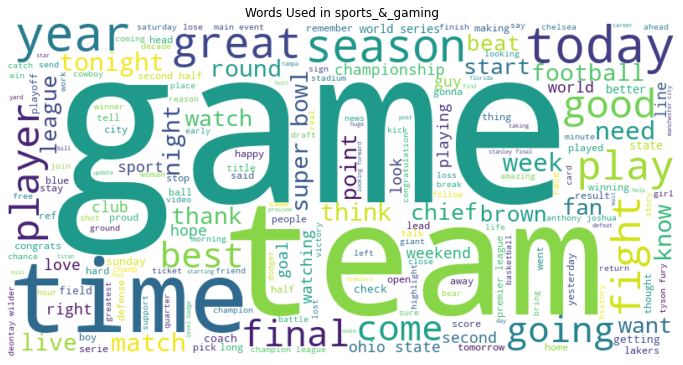

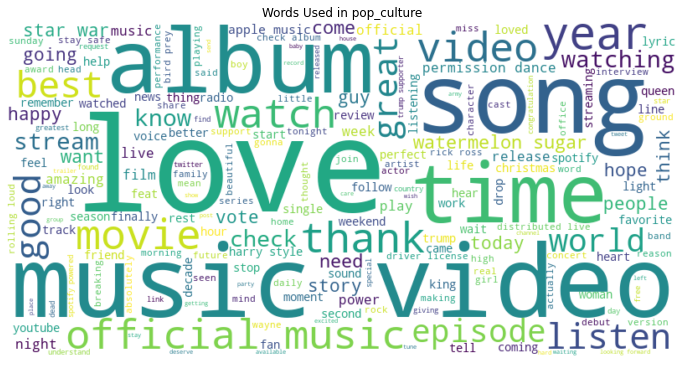

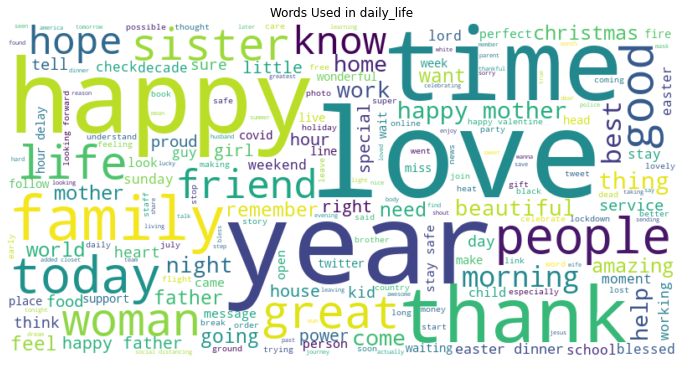

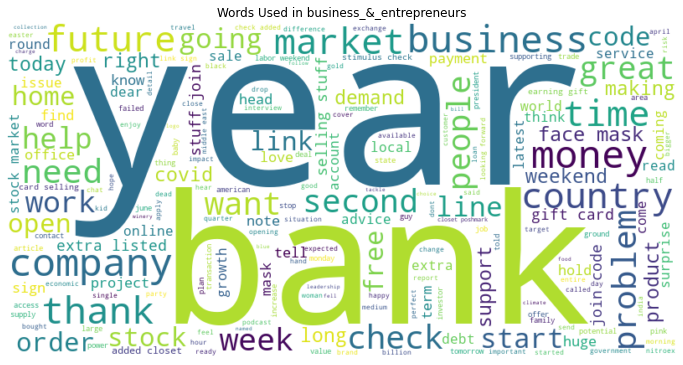

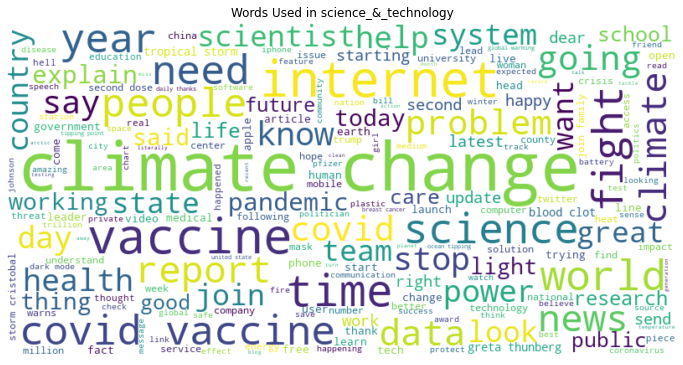

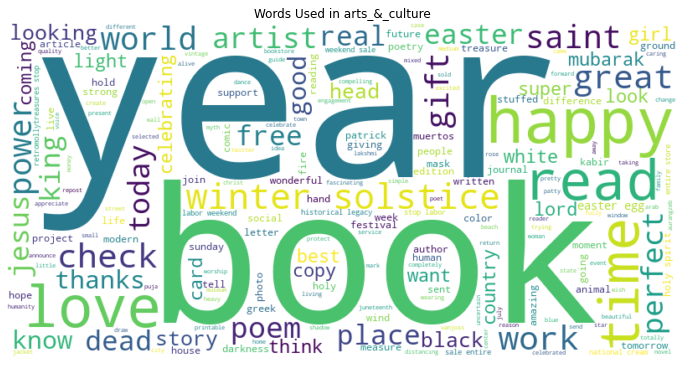

In [12]:
for i in df.label_name.unique():
    text=''
    text=' '.join(df[df['label_name']==i]['cleaned_text'].values)
    #print(text)
   # for line in text:
      #  words+=' '+line
   # print(words)
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Display the word cloud
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Words Used in '+i)
    plt.axis("off")
    plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
cv=CountVectorizer()

In [15]:
X=cv.fit_transform(df.cleaned_text)

In [16]:
y=df.label_name

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


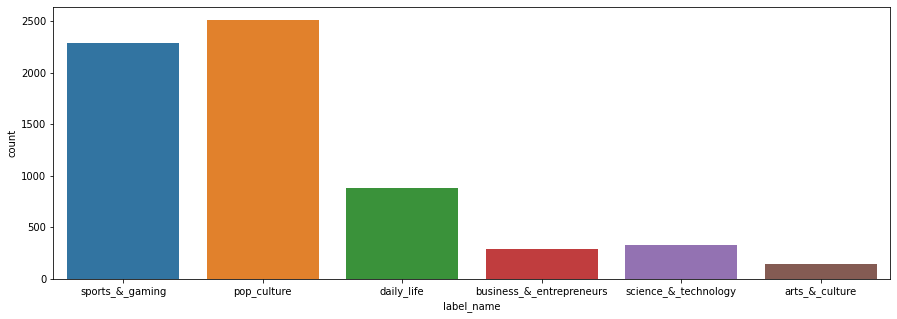

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(y);

In [18]:
from imblearn.over_sampling import SMOTE
over_sampling=SMOTE()
X,y=over_sampling.fit_resample(X,y)

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


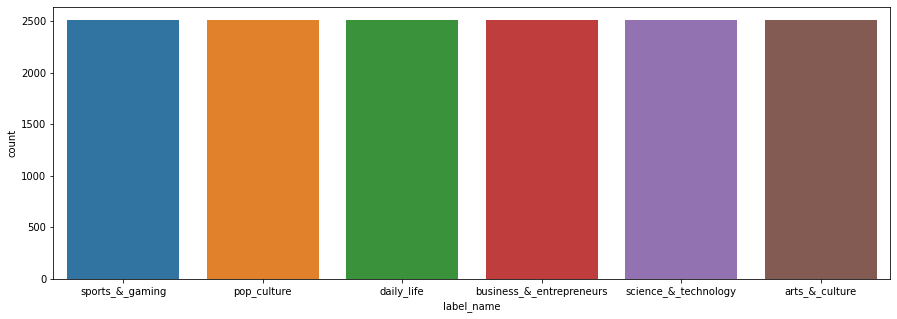

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(y);

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)

+ ==================================================================================================== +
			1-For Support Vector Classifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.5970809376382131
--------------------------------------------------
F1 :  [0.53943825 0.47241045 0.41248817 0.72684086 0.58475336 0.76992288]
--------------------------------------------------
Reacll :  [0.9309429  0.32403718 0.28912467 0.81167109 0.43236074 0.79442971]
--------------------------------------------------
Precision :  [0.37973998 0.87142857 0.71947195 0.65806452 0.90304709 0.74688279]
--------------------------------------------------
cross validation accuracy :  0.6102721957564532
--------------------------------------------------
Confusion Matrix....
 [[701   0   6  29   5  12]
 [435 244  13  35   6  20]
 [307  19 218 134  16  60]
 [  8   7  37 612   7  83]
 [350   5   6  39 326  28]
 [ 

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


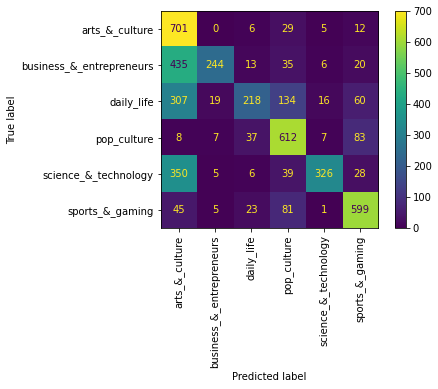

							-----------------------------------------------------------
							 Time for detection (Support Vector Classifier) : 129.151 seconds...
							-----------------------------------------------------------



c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+ ==================================================================================================== +
			2-For LogisitcRegression The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.6463954002653693
--------------------------------------------------
F1 :  [0.56599287 0.55594406 0.55572755 0.78291815 0.63761098 0.81471201]
--------------------------------------------------
Reacll :  [0.94820717 0.42231076 0.47612732 0.72944297 0.52387268 0.77851459]
--------------------------------------------------
Precision :  [0.40338983 0.81329923 0.66728625 0.84485407 0.81443299 0.85443959]
--------------------------------------------------
cross validation accuracy :  0.6569799751518893
--------------------------------------------------
Confusion Matrix....
 [[714   0  19   9   7   4]
 [387 318  26   6  13   3]
 [284  19 359  30  35  27]
 [ 26  21  77 550  27  53]
 [311   8  16  11 395  13]
 [ 48  25 

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


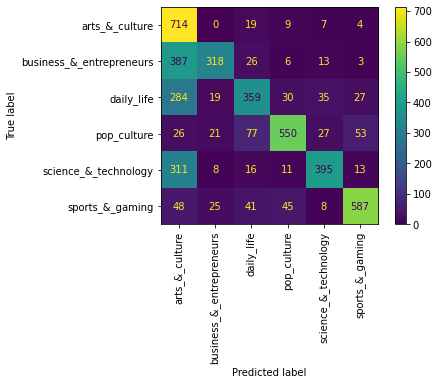

							-----------------------------------------------------------
							 Time for detection (LogisitcRegression) : 11.597 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For KNeighborsClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.45002211410880144
--------------------------------------------------
F1 :  [0.49094139 0.41558442 0.39891082 0.35332606 0.53780314 0.42535787]
--------------------------------------------------
Reacll :  [0.91766268 0.40371846 0.38859416 0.21485411 0.5        0.27586207]
--------------------------------------------------
Precision :  [0.33511154 0.42816901 0.40979021 0.99386503 0.58179012 0.92857143]
--------------------------------------------------
cross validation accuracy :  0.42814476610532826
-----------

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


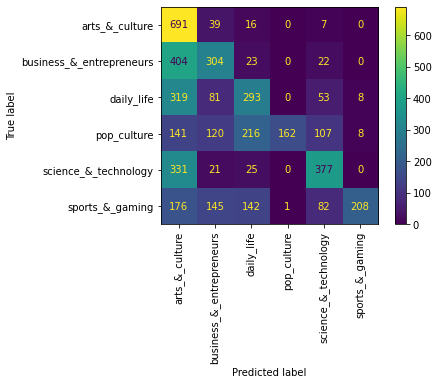

							-----------------------------------------------------------
							 Time for detection (KNeighborsClassifier) : 9.188 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For RandomForestClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.6187527642636002
--------------------------------------------------
F1 :  [0.55934195 0.52925764 0.52415813 0.74079875 0.62829736 0.76721763]
--------------------------------------------------
Reacll :  [0.94820717 0.40239044 0.47480106 0.62732095 0.52122016 0.73872679]
--------------------------------------------------
Precision :  [0.39666667 0.77295918 0.58496732 0.90439771 0.79074447 0.79799427]
--------------------------------------------------
cross validation accuracy :  0.6330283552377463
----------

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


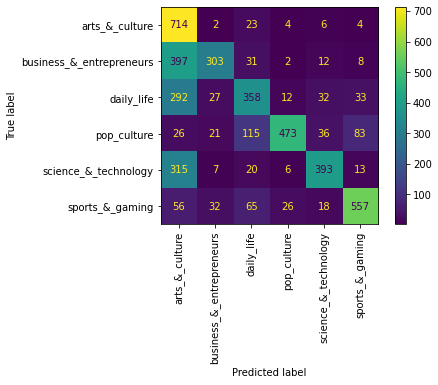

							-----------------------------------------------------------
							 Time for detection (RandomForestClassifier) : 304.095 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Naive Bayes The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.640203449800973
--------------------------------------------------
F1 :  [0.54738632 0.52302026 0.57250188 0.78918919 0.6179966  0.78960396]
--------------------------------------------------
Reacll :  [0.85524568 0.37715803 0.50530504 0.77453581 0.48275862 0.84615385]
--------------------------------------------------
Precision :  [0.4025     0.85285285 0.66031196 0.80440771 0.85849057 0.74013921]
--------------------------------------------------
cross validation accuracy :  0.5895739396360379
------------------

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


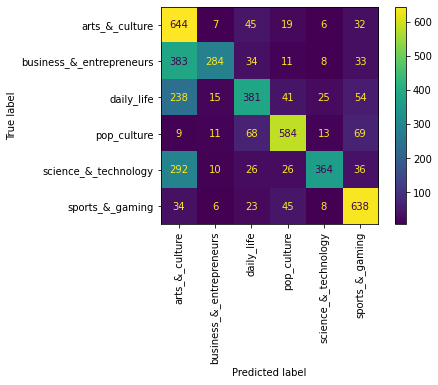

							-----------------------------------------------------------
							 Time for detection (Naive Bayes) : 1.22 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			6-For DecisionTreeClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.5906678460858027
--------------------------------------------------
F1 :  [0.54773678 0.52504318 0.47933884 0.6953125  0.61980831 0.71018651]
--------------------------------------------------
Reacll :  [0.9561753  0.40371846 0.42307692 0.59018568 0.51458886 0.65649867]
--------------------------------------------------
Precision :  [0.38379531 0.75061728 0.55285962 0.8460076  0.77911647 0.7734375 ]
--------------------------------------------------
cross validation accuracy :  0.6042335986512912
--------------------

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


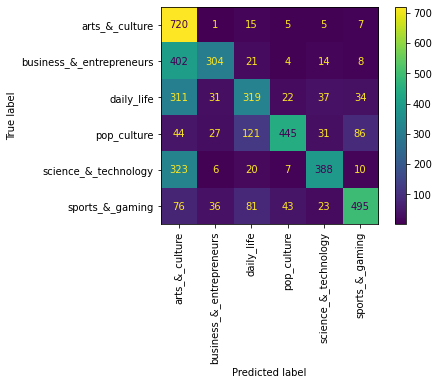

							-----------------------------------------------------------
							 Time for detection (DecisionTreeClassifier) : 12.11 seconds...
							-----------------------------------------------------------



,Model,Accuracy,Precision,Recall,F1_Score,Confusion Matrix
0,Support Vector Classifier,0.597081,"[0.3797399783315276, 0.8714285714285714, 0.719...","[0.9309428950863213, 0.3240371845949535, 0.289...","[0.5394382454790303, 0.47241045498547923, 0.41...","[[701, 0, 6, 29, 5, 12], [435, 244, 13, 35, 6,..."
1,LogisitcRegression,0.646395,"[0.4033898305084746, 0.8132992327365729, 0.667...","[0.9482071713147411, 0.42231075697211157, 0.47...","[0.5659928656361475, 0.5559440559440559, 0.555...","[[714, 0, 19, 9, 7, 4], [387, 318, 26, 6, 13, ..."
2,KNeighborsClassifier,0.450022,"[0.33511154219204653, 0.428169014084507, 0.409...","[0.9176626826029216, 0.4037184594953519, 0.388...","[0.4909413854351688, 0.4155844155844156, 0.398...","[[691, 39, 16, 0, 7, 0], [404, 304, 23, 0, 22,..."
3,RandomForestClassifier,0.618753,"[0.39666666666666667, 0.7729591836734694, 0.58...","[0.9482071713147411, 0.40239043824701193, 0.47...","[0.5593419506462984, 0.5292576419213973, 0.524...","[[714, 2, 23, 4, 6, 4], [397, 303, 31, 2, 12, ..."
4,Naive Bayes,0.640203,"[0.4025, 0.8528528528528528, 0.660311958405545...","[0.8552456839309429, 0.37715803452855245, 0.50...","[0.5473863153421166, 0.5230202578268877, 0.572...","[[644, 7, 45, 19, 6, 32], [383, 284, 34, 11, 8..."
5,DecisionTreeClassifier,0.590668,"[0.3837953091684435, 0.7506172839506173, 0.552...","[0.9561752988047809, 0.4037184594953519, 0.423...","[0.5477367820464055, 0.5250431778929188, 0.479...","[[720, 1, 15, 5, 5, 7], [402, 304, 21, 4, 14, ..."


In [27]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,\
classification_report, plot_confusion_matrix

# check the performance on diffrent regressor
models = []
models.append(('Support Vector Classifier', svm.SVC()))
models.append(('LogisitcRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('Naive Bayes', MultinomialNB()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))


# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)
    
    # evaluate model
    scores = cross_val_score(clf, X, y, cv=cv, n_jobs=-1)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('cross validation accuracy : ', np.mean(scores))
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.xticks(rotation=90)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})